In [2]:
#import libraries 
import numpy as np     
import pandas as pd 
import sklearn         
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN as DB
from matplotlib import cm
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import OPTICS
from sklearn.neighbors import NearestNeighbors
import sklearn.manifold
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [3]:
#normalize data
def scale(data):
    scaler = sklearn.preprocessing.StandardScaler()
    scaler.fit(data.values)
    data_scaled = scaler.transform(data.values)
    df = pd.DataFrame(data_scaled)
    return df

In [18]:
#function to perform PCA
def pca(data):
    #set up PCA and reduce to two dimensions
    #Compute dimensions
    PCA = sklearn.decomposition.PCA().fit(data)

    #Fit datapoints to dimensions
    data_PCA = PCA.fit_transform(data)
    df_PCA = pd.DataFrame(data_PCA)
    df_data = pd.DataFrame(data)
    
    plt.plot(range(1,93), PCA.explained_variance_ratio_, marker = '.')
    plt.xlabel('Components')
    plt.ylabel('Explained Variance Ratio')
    plt.grid()
    plt.show()
    
    #rename columns
    for i in range(0, df_PCA.shape[1] + 1):
        df_PCA.rename(columns = {i : 'PCA' + str(i + 1)}, inplace = True) 

    plt.scatter(df_PCA.PCA1, df_PCA.PCA2,
        s=50, color = 'blue', alpha = 0.5, marker='o', edgecolor='black')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    
    PCA_array = np.array(df_PCA)
    fig = plt.figure(figsize=(5, 5)) 
    ax = fig.add_subplot(111, projection ='3d') 
    ax.scatter(PCA_array[:, 0], PCA_array[:, 1], PCA_array[:, 2], marker ='.', color = 'blue', alpha = 0.5, edgecolor = 'black')
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    ax.set_zlabel('PCA 3')
    plt.show() 
    
    df_PCA_join = pd.concat([df_data, df_PCA], axis = 1)
    return df_PCA

#perform t-SNE
def tsne(data, ncomp):
    TSNE = sklearn.manifold.TSNE(n_components = ncomp).fit(data)
    # Use it to transform our data
    data_TSNE = TSNE.fit_transform(data)
    
    df_TSNE = pd.DataFrame(data_TSNE)
    df_data = pd.DataFrame(data)
    
    #rename columns
    for i in range(0, df_TSNE.shape[1] + 1):
        df_TSNE.rename(columns = {i : 'TSNE' + str(i + 1)}, inplace = True) 
    
    plt.scatter(df_TSNE.TSNE1, df_TSNE.TSNE2,
        s=50, color = 'black', alpha = 0.5, marker='o', edgecolor='black')
    plt.xlabel('TSNE1')
    plt.ylabel('TSNE2')

    df_TSNE_join = pd.concat([df_data, df_TSNE], axis = 1)
    return df_TSNE

In [13]:
#function to perform kmeans, has two parts: checking number of ks and performing k-means clustering
def kcheck(data):
    SSE = []
    for i in range(1, 92):
        kmc = KMeans(n_clusters = i)
        kmc.fit(data)
        SSE.append(kmc.inertia_)

    #plot changes in SSE as clusters increase
    plt.plot(range(1,92), SSE, marker = '.')
    plt.xlabel('# clusters')
    plt.ylabel('SSE')
    plt.grid()
    plt.show()
    
def kmeans(data, num_clus):
    #Compute K-means clusters n_init runs the alg x times and chooses most optimum solution
    km = KMeans(n_clusters = num_clus, n_init = 100).fit_predict(data)
    data['clusters'] = km
    plot(data, data.iloc[:,0], data.iloc[:,1])
    return data

In [14]:
#plot by cluster
def plot(data, a, b):
    data_df = pd.DataFrame(data)
    n_clusters = max(data.clusters)
    viridis = cm.get_cmap('viridis', 256)
    colors = viridis(np.linspace(0, 1, n_clusters+1))
    
    for i in range (0 , n_clusters + 1):
        plt.scatter(
        a[data_df.clusters == i], b[data_df.clusters == i],
        s=50, color = colors[i], alpha = 0.5, marker='o', edgecolor='black',
        label = str('Cluster ' + str(i + 1)),
        )
  
    plt.scatter(
        a[data_df.clusters == -1], b[data_df.clusters == -1],
        s=50, color = 'black', alpha = 0.5, marker='.', edgecolor='black',
        label = str('Noise')
        )

    plt.legend(scatterpoints=1, bbox_to_anchor=(1.05, 1))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

In [7]:
data = pd.read_csv('D:/PSU/Courses/Spring 2021/561 DDD/Project/Clustering/GSL2.csv')
data

,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function.,pronoun,ppron,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,96.30,34.06,26.12,20.15,20.62,39.18,66.79,32.46,3.36,0.75,...,5.60,0.00,0.37,0.0,0.0,5.97,1.49,0.00,8.21,1.49
1,99.00,63.49,7.40,94.13,25.38,31.53,65.02,37.44,2.96,0.99,...,2.96,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.99,1.48
2,96.95,71.80,19.62,18.67,17.33,43.27,63.46,36.06,7.69,3.37,...,2.88,0.48,0.00,0.0,0.0,0.96,0.00,0.00,0.96,0.48
3,99.00,69.05,2.75,63.50,25.12,35.32,65.67,42.79,2.99,0.50,...,1.00,0.00,0.00,0.0,0.0,1.00,0.00,0.00,2.99,0.00
4,99.00,47.44,30.21,43.21,19.56,33.23,71.25,35.46,1.92,0.96,...,2.24,0.00,0.96,0.0,0.0,3.51,0.64,0.00,3.19,1.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35160,98.91,70.08,24.80,68.35,22.17,37.22,61.28,35.34,3.76,1.50,...,1.88,0.00,1.13,0.0,0.0,4.14,0.00,0.00,2.26,3.01
35161,99.00,72.77,94.65,7.96,24.00,35.23,74.62,36.36,3.79,1.52,...,6.06,0.38,0.00,0.0,0.0,0.76,0.76,0.00,2.27,0.00
35162,98.03,48.73,24.32,25.77,31.50,28.57,60.32,36.83,3.17,1.27,...,3.17,0.00,0.32,0.0,0.0,7.30,0.00,0.00,2.54,2.22
35163,99.00,52.55,54.36,49.48,26.17,40.13,71.97,38.22,3.18,1.27,...,5.10,0.00,0.00,0.0,0.0,0.00,0.00,1.27,0.00,0.00


In [8]:
data_scale = scale(data)
data_scale

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
0,-0.077544,-2.196038,0.162644,-0.525240,-0.808830,0.361342,0.512296,-0.690856,-0.295214,-0.582940,...,0.800345,-0.312846,0.304947,-0.078204,-0.006856,1.367473,3.141828,-0.333180,2.160782,0.115532
1,0.797431,0.435534,-0.818116,2.933377,0.154196,-1.067120,0.261440,0.460109,-0.511136,-0.329103,...,-0.674007,-0.312846,-0.417999,-0.078204,-0.006856,-1.269688,-0.243268,-0.333180,-0.753749,0.109988
2,0.133098,1.178597,-0.177898,-0.594431,-1.474451,1.125056,0.040346,0.141167,2.042142,2.188112,...,-0.718684,1.172965,-0.417999,-0.078204,-0.006856,-0.845622,-0.243268,-0.333180,-0.765859,-0.444349
3,0.797431,0.932698,-1.061735,1.501403,0.101594,-0.359424,0.353562,1.696586,-0.494941,-0.847353,...,-1.768601,-0.312846,-0.417999,-0.078204,-0.006856,-0.827952,-0.243268,-0.333180,0.053600,-0.710431
4,0.797431,-0.999625,0.376923,0.552831,-1.023285,-0.749684,1.144398,0.002496,-1.072533,-0.360833,...,-1.076103,-0.312846,1.457752,-0.078204,-0.006856,0.280804,1.210733,-0.333180,0.134335,0.353897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35160,0.768266,1.024798,0.093487,1.728144,-0.495240,-0.004643,-0.268619,-0.025238,-0.079292,0.210300,...,-1.277151,-0.312846,1.789917,-0.078204,-0.006856,0.559097,-0.243268,-0.333180,-0.241082,0.958124
35161,0.797431,1.265333,3.753000,-1.095131,-0.125000,-0.376230,1.622018,0.210502,-0.063097,0.231453,...,1.057240,0.863421,-0.417999,-0.078204,-0.006856,-0.933969,1.483358,-0.333180,-0.237046,-0.710431
35162,0.483089,-0.884276,0.068340,-0.262501,1.392373,-1.619832,-0.404677,0.319127,-0.397776,-0.032960,...,-0.556729,-0.312846,0.207251,-0.078204,-0.006856,1.954981,-0.243268,-0.333180,-0.128053,0.520198
35163,0.797431,-0.542699,1.642166,0.845958,0.314026,0.538733,1.246442,0.640380,-0.392378,-0.032960,...,0.521112,-0.312846,-0.417999,-0.078204,-0.006856,-1.269688,-0.243268,3.457316,-1.153387,-0.710431


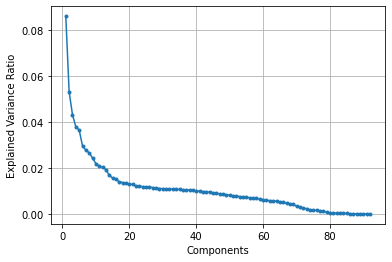

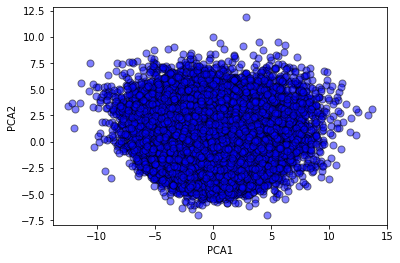

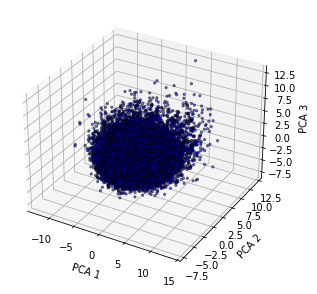

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15
0,-2.034044,2.724571,-0.471202,2.870987,1.205847,-2.639687,2.571420,2.598027,-0.518515,2.360099,-1.756401,3.747473,0.833811,1.054616,-1.730063
1,1.514310,-2.276940,-1.468148,-1.478846,0.135829,3.183032,0.705447,0.362692,1.578806,-0.589173,1.152969,1.707425,-0.966349,0.040674,-0.269063
2,2.578061,-2.288192,2.186869,-0.660577,0.543280,0.466546,-1.479204,-1.435668,-1.764327,1.929601,-1.430096,-0.795336,-0.293438,-1.182480,-0.339443
3,0.985759,-2.204836,-0.779249,-0.420385,0.734491,3.620700,3.160641,-3.743314,1.090204,-1.654476,-1.471709,0.962338,0.699573,0.999377,3.745949
4,0.634517,3.986050,-3.441198,-1.395145,-1.983748,2.739292,-1.159553,-0.249549,-0.191563,1.434778,3.913625,-1.096808,0.691501,-4.212318,2.171482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35160,-1.376031,-0.224643,0.516951,-2.934476,-1.776837,2.768624,-1.998044,0.505667,2.657444,0.663824,-0.972857,-0.622487,0.312181,-0.657841,-0.322137
35161,2.725466,1.017685,-1.422991,-4.819588,3.480848,-2.658489,-2.010595,1.989231,-1.332187,0.915582,-2.866496,-0.475688,-0.280379,1.665484,-2.552655
35162,-1.898154,1.383763,-0.764319,-1.369125,1.192200,-1.030613,-1.745246,1.444683,-0.941717,-2.367324,0.377251,0.027412,-0.680285,-1.352361,-0.536708
35163,3.569181,2.376970,-1.280501,-2.012573,4.557757,-0.378151,0.195568,1.816760,0.644660,1.829377,-1.942242,4.365868,-1.406911,2.715119,-2.540989


In [27]:
data_pca = pca(data_scale)
data_pca_split = data_pca.iloc[:, :15]
data_pca_split

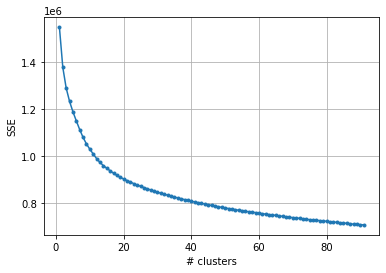

In [28]:
kcheck(data_pca_split)

<ipython-input-13-0cbdcb257920>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clusters'] = km


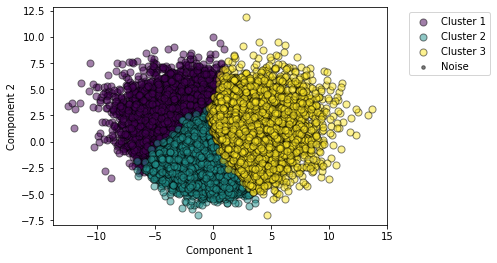

In [35]:
data_km = kmeans(data_pca_split, 3)

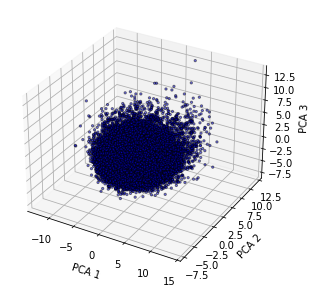

In [23]:
PCA_array = np.array(data_km)
fig = plt.figure(figsize=(5, 5)) 
ax = fig.add_subplot(111, projection ='3d') 
ax.scatter(PCA_array[:, 0], PCA_array[:, 1], PCA_array[:, 2], marker ='.', color = 'blue', alpha = 0.5, edgecolor = 'black')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.show() 